In [ ]:
# Cell 1: imports & helpers
%matplotlib inline
import io, requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from IPython.display import display
plt.rcParams['figure.figsize'] = (8,5)

DEFAULT_SAMPLE_URL = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"

def read_upload():
    uploaded = files.upload()
    if not uploaded:
        raise RuntimeError("No file uploaded.")
    name = next(iter(uploaded))
    return pd.read_csv(io.BytesIO(uploaded[name])), name

def read_url(u):
    r = requests.get(u); r.raise_for_status()
    return pd.read_csv(io.BytesIO(r.content)), u

def read_hardcoded():
    return read_url(DEFAULT_SAMPLE_URL)

In [ ]:
# Cell 2: load dataframe (three methods)
m = input("1=upload  2=enter URL  3=use example >> ").strip()
if m == '1':
    df, source = read_upload()
elif m == '2':
    url = input("CSV URL >> ").strip()
    df, source = read_url(url)
elif m == '3':
    df, source = read_hardcoded()
else:
    raise RuntimeError("Invalid choice")
print("Loaded from:", source)

1=upload  2=enter URL  3=use example >> 1


Saving customers-100.csv to customers-100.csv
Loaded from: customers-100.csv


In [ ]:
# Cell 3: show headings and first two rows; store column names
cols = df.columns.tolist()
print("Columns:", cols)
print("\nFirst two rows:")
display(df.head(2))

Columns: ['Index', 'Customer Id', 'First Name', 'Last Name', 'Company', 'City', 'Country', 'Phone 1', 'Phone 2', 'Email', 'Subscription Date', 'Website']

First two rows:


,Index,Customer Id,First Name,Last Name,Company,City,Country,Phone 1,Phone 2,Email,Subscription Date,Website
0,1,DD37Cf93aecA6Dc,Sheryl,Baxter,Rasmussen Group,East Leonard,Chile,229.077.5154,397.884.0519x718,zunigavanessa@smith.info,2020-08-24,http://www.stephenson.com/
1,2,1Ef7b82A4CAAD10,Preston,Lozano,Vega-Gentry,East Jimmychester,Djibouti,5153435776,686-620-1820x944,vmata@colon.com,2021-04-23,http://www.hobbs.com/


0 Index int64
1 Customer Id object
2 First Name object
3 Last Name object
4 Company object
5 City object
6 Country object
7 Phone 1 object
8 Phone 2 object
9 Email object
10 Subscription Date object
11 Website object
Plot 1 or 2 columns? (enter 1 or 2) >> 1
Index of column to plot (y vs row index) >> 1


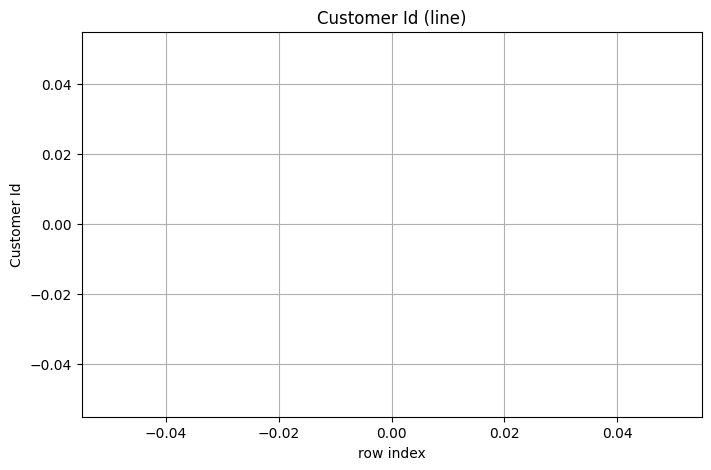

In [ ]:
# Cell 4: choose columns, convert to NumPy, and plot
for i,c in enumerate(cols):
    print(i, c, df[c].dtype)
choice = input("Plot 1 or 2 columns? (enter 1 or 2) >> ").strip()
if choice == '1':
    i = int(input("Index of column to plot (y vs row index) >> ").strip())
    cname = cols[i]
    y = pd.to_numeric(df[cname], errors='coerce').to_numpy()
    x = np.arange(len(y))
    mask = ~np.isnan(y)
    plt.plot(x[mask], y[mask])
    plt.xlabel("row index"); plt.ylabel(cname); plt.title(f"{cname} (line)")
    plt.grid(True); plt.show()
    x_np, y_np = x[mask], y[mask]; col_x, col_y = "index", cname
else:
    ix = int(input("Index of X column >> ").strip())
    iy = int(input("Index of Y column >> ").strip())
    col_x, col_y = cols[ix], cols[iy]
    x_raw = pd.to_numeric(df[col_x], errors='coerce')
    y_raw = pd.to_numeric(df[col_y], errors='coerce')
    if x_raw.isna().all():
        x_vals = pd.Categorical(df[col_x]).codes
    else:
        x_vals = x_raw.to_numpy()
    if y_raw.isna().all():
        y_vals = pd.Categorical(df[col_y]).codes
    else:
        y_vals = y_raw.to_numpy()
    mask = ~(pd.isna(x_vals) | pd.isna(y_vals))
    x_np, y_np = x_vals[mask], y_vals[mask]
    ptype = input("Plot type ('scatter' or 'line') >> ").strip().lower() or 'scatter'
    if ptype == 'line':
        plt.plot(x_np, y_np)
    else:
        plt.scatter(x_np, y_np)
    plt.xlabel(col_x); plt.ylabel(col_y); plt.title(f"{col_y} vs {col_x}"); plt.grid(True); plt.show()

In [ ]:
# Cell 5: quick interpretation (basic stats & correlation when numeric)
def interpret(x_np, y_np, col_x, col_y):
    try:
        x = x_np.astype(float); y = y_np.astype(float)
        print(f"{col_x}: mean={np.nanmean(x):.4f} std={np.nanstd(x):.4f} min={np.nanmin(x):.4f} max={np.nanmax(x):.4f}")
        print(f"{col_y}: mean={np.nanmean(y):.4f} std={np.nanstd(y):.4f} min={np.nanmin(y):.4f} max={np.nanmax(y):.4f}")
        if len(x) >= 2:
            r = np.corrcoef(x, y)[0,1]
            print(f"Pearson r = {r:.4f}")
    except Exception:
        print("Non-numeric data — showing sample values:")
        print("x sample:", x_np[:10])
        print("y sample:", y_np[:10])

# If single-column plot was used, x_np is row indices and col_x is 'index'
try:
    interpret(x_np, y_np, col_x, col_y)
except NameError:
    print("No plotted data found.")

Non-numeric data — showing sample values:
x sample: []
y sample: []


/tmp/ipython-input-1542656400.py:5: RuntimeWarning: Mean of empty slice
  print(f"{col_x}: mean={np.nanmean(x):.4f} std={np.nanstd(x):.4f} min={np.nanmin(x):.4f} max={np.nanmax(x):.4f}")
/usr/local/lib/python3.12/dist-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
